# <center> Spark Funds Investment Analysis Assignment </center><br>
<center> By Kingshuk Dey </center>

## Project Brief
<blockquote> You work for Spark Funds, an asset management company. Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.</blockquote>

## Business and Data Understanding
<blockquote> <ul> <li>It wants to invest between 5 to 15 million USD per round of investment </li>
<li>It wants to invest only in English-speaking countries</li> </ul>
</blockquote>


## Business Objective
<blockquote>The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.</blockquote>

## Data Analysis Goals
<blockquote><ol><li>Investment type analysis</li><li>Country analysis</li><li>Sector analysis</li>

In [1]:
#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#Import libraries
import numpy as np
import pandas as pd

## 1.1 Checkpoint 1: Data Cleaning 1
<blockquote><ol><li>Load the companies and rounds data (provided on the previous page) into two data frames and name them companies and rounds2 respectively.</li>
<li>Answer the below questions:</li>
<ul><li>How many unique companies are present in rounds2?</li>
<li>How many unique companies are present in companies?</li>
<li>In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.</li>
<li>Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N</li>
<li>Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?</li>
</blockquote>

In [2]:
#Create companies dataframe
companies_df = pd.read_csv('companies.txt',sep='\t', encoding='latin')

#Create rounds2 dataframe
rounds2_df = pd.read_csv('rounds2.csv',encoding='latin')

In [3]:
#Row count in Companies table
rounds2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [4]:
#Have a look at rounds2 dataframe sample data
rounds2_df.head(10)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0
7,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
9,/ORGANIZATION/0XDATA,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0


In [5]:
#Remove special characters from permalinks
rounds2_df['company_permalink']=rounds2_df[['company_permalink']].applymap(lambda x:x.encode('utf-8').decode('ascii', 'ignore'))

#It's been observed that same company permalinks are present in both upper and lowercases, hence to make it uniform, making 
#the permalinks to lowercase
rounds2_df['company_permalink']=rounds2_df[['company_permalink']].applymap(lambda x:x.lower())

In [6]:
#Find number of unique companies present in rounds2 dataframe
print(rounds2_df.company_permalink.nunique(dropna=True))

66368


<blockquote>How many <b>unique companies</b> are present in <b>rounds2</b>?<br>
Answer:66368 </blockquote>

In [7]:
#Row count in Companies table
companies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [8]:
#Look at sample data from companies dataframe
companies_df.head(100)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
5,/Organization/01Games-Technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
6,/Organization/0Ndine-Biomedical-Inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
7,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
8,/Organization/1,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011
9,/Organization/1-2-3-Listo,"1,2,3 Listo",http://www.123listo.com,E-Commerce,operating,CHL,12,Santiago,Las Condes,01-01-2012


In [9]:
#Remove special characters from permalinks
companies_df['permalink']=companies_df[['permalink']].applymap(lambda x:x.encode('utf-8').decode('ascii', 'ignore'))

#It's been observed that same company permalinks are present in both upper and lowercases, hence to make it unifor, making 
#the permalinks to lowercase
companies_df['permalink']=companies_df[['permalink']].applymap(lambda x:x.lower()) 

In [10]:
#print(companies_df.name.nunique(dropna=True))

#Print number of unique companies. 'name' is not unique, also permalink is present in rounds2 table   
print(companies_df.permalink.nunique(dropna=True))

66368


<blockquote> How many <b>unique companies</b> are present in <b>companies</b>? <br>
Answer: 66368 </blockquote>

In [11]:
#Identifying Companies that are present in rounds2 dataframe but not in companies dataframe
diff=rounds2_df[rounds2_df.company_permalink.isin(companies_df.permalink)==False]
print(diff.company_permalink.unique())
#The result didn't return anything, hence the answer is N

[]


<blockquote>Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: <b>Y/N</b><br>
    Answer: <b>N</b> </br></blockquote>

In [12]:
#Creating Master dataframe.
master_frame=rounds2_df.merge(companies_df,left_on='company_permalink',right_on='permalink',how='left')

In [13]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
permalink                  114949 non-null object
name                       114948 non-null object
homepage_url               108815 non-null object
category_list              111539 non-null object
status                     114949 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94428 non-null object
dtypes: float64(1), object(15)
memory usage: 14.9+ MB


<blockquote>Merge the two data frames so that all variables (columns) in the <b>companies</b> frame are added to the <b>rounds2</b> data frame. Name the merged frame <b>master_frame</b>. How many observations are present in <b>master_frame<b>?<br> Answer: 114949 </blockquote>

In [14]:
master_frame.head(10)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011


In [15]:
#Keeping a copy of Master DataFrame before further cleaning
master_frame_original=master_frame.copy()

<p><b>Master Frame Data Cleaning</b><p>

In [16]:
#Percentage of NULL/NaN values per column
round((master_frame.isnull().sum()/len(master_frame.index))*100,2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

In [17]:
#Number of NULL/NaN values per column
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [18]:
#Removing rows where raised_amount_usd is NULL
master_frame=master_frame.dropna(subset=['raised_amount_usd'])

In [19]:
#Removing rows where country_code is NULL
master_frame=master_frame.dropna(subset=['country_code'])

In [20]:
#Number of rows after data cleaning 
master_frame.shape[0]

89108

In [21]:
#Percentage of rows selected from the main dataset for further analysis
round(len(master_frame)/len(master_frame_original)*100,2)

77.52

In [22]:
#Converting raised_amount_usd to million usd
master_frame['raised_amount_usd']=master_frame['raised_amount_usd'].apply(lambda x : round(x/1000000,3))

## 2.1 Checkpoint 2: Investment Type Analysis
<ol><li>Average funding amount of venture type</li>
<li>Average funding amount of angel type</li>
<li>Average funding amount of seed type</li>
<li>Average funding amount of private equity type</li>
<li>Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?</li>

In [23]:
#Calculation Average per Funding round type
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean()

funding_round_type
angel                      0.968561
convertible_note           1.331935
debt_financing            17.186401
equity_crowdfunding        0.510953
grant                      4.508467
non_equity_assistance      0.471460
post_ipo_debt            169.451801
post_ipo_equity           66.018787
private_equity            73.618561
product_crowdfunding       1.489675
secondary_market          81.527207
seed                       0.748104
undisclosed               15.851079
venture                   11.735780
Name: raised_amount_usd, dtype: float64

<b>Answers:</b>
<ol><li>Average funding amount of venture type: <b>11.736 million USD</b></li>
<li>Average funding amount of angel type: <b>0.969 million USD</b></li>
<li>Average funding amount of seed type: <b>0.748 million USD</b></li>
<li>Average funding amount of private equity type: <b> 73.619 million USD</b></li>    

In [24]:
#Identifying funding round type which falls between 5 to 15 million USD
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().between(5.0,15.0,inclusive=True)

funding_round_type
angel                    False
convertible_note         False
debt_financing           False
equity_crowdfunding      False
grant                    False
non_equity_assistance    False
post_ipo_debt            False
post_ipo_equity          False
private_equity           False
product_crowdfunding     False
secondary_market         False
seed                     False
undisclosed              False
venture                   True
Name: raised_amount_usd, dtype: bool

<li>Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them? : <br> Answer:<b> Venture Type</b></li>

In [25]:
#Keeping the records for Venture Type only
master_frame_venture=master_frame[master_frame.funding_round_type=='venture']

In [26]:
master_frame_venture.shape[0]

48111

In [27]:
#As the data is already filtered by funding_round_type, so dropping this column as well
master_frame_venture=master_frame_venture.drop(['funding_round_type'],axis=1)

## 3.1 Checkpoint 3: Country Analysis
<ol><li>Spark Funds wants to see the top nine countries which have received the highest total funding</li>
<li>For the chosen investment type, make a data frame named top9 with the top nine countries</li>
<li>Identify the top three English-speaking countries in the data frame top9</li>

In [28]:
#Create Dataframe with top 9 countries based on total funding received
top9=master_frame_venture.groupby('country_code',as_index=False)['raised_amount_usd'].sum().sort_values(by=['raised_amount_usd'],ascending=False).head(9)

In [29]:
top9['Rank']=range(1,10)

In [30]:
top9.set_index(['Rank'],inplace = True)

In [31]:
top9

,country_code,raised_amount_usd
Rank,,
1,USA,422510.872
2,CHN,39835.418
3,GBR,20245.629
4,IND,14391.859
5,CAN,9583.323
6,FRA,7259.532
7,ISR,6907.514
8,DEU,6346.960
9,JPN,3363.676


<blockquote> Top 3 countries are as follows. <b>Note:</b>China is not an English speaking country, hence not considerd.
<ol><li>USA</li><li>GBR</li><li>IND</li>

## 4.1 Checkpoint 4: Sector Analysis 1
<blockquote>You discuss with the CEO and come up with the business rule that the first string before the vertical bar will be considered the primary sector. In the example above, ‘Application Platforms’ will be considered the primary sector.

<ol><li>Extract the primary sector of each category list from the category_list column</li>
<li>Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)</li></blockquote>

In [32]:
#Dropping unnecessary columns.from master frame.
master_frame_venture=master_frame_venture.drop(['funding_round_code','funded_at','state_code','region','city','founded_at'],axis=1)

In [33]:
#Split Category list by '|' and take the first category as Prime sector
master_frame_venture['Primary_Sector'] = master_frame_venture['category_list'].str.split('|',expand=True)[0]

In [34]:
master_frame_venture.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48111 entries, 0 to 114941
Data columns (total 10 columns):
company_permalink          48111 non-null object
funding_round_permalink    48111 non-null object
raised_amount_usd          48111 non-null float64
permalink                  48111 non-null object
name                       48111 non-null object
homepage_url               45936 non-null object
category_list              47809 non-null object
status                     48111 non-null object
country_code               48111 non-null object
Primary_Sector             47809 non-null object
dtypes: float64(1), object(9)
memory usage: 4.0+ MB


In [35]:
#Create mapping dataframe
mapping_df = pd.read_csv('mapping.csv',sep=',',encoding='latin')
mapping_df.category_list = mapping_df.category_list.replace({'0':'na', '2.na' :'2.0'}, regex=True)
mapping_df.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [36]:
mapping_df_melt=pd.melt(mapping_df, id_vars=['category_list'],value_vars=['Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'])

In [37]:
#Keeping the rows where value==1
mapping_df=mapping_df_melt[mapping_df_melt.value==1]

In [38]:
mapping_df.shape[0]

688

In [39]:
mapping_df=mapping_df[mapping_df['variable']!='Blanks']

In [40]:
mapping_df=mapping_df.rename(columns={'category_list':'Primary_Sector','variable':'main_sector'})

In [41]:
mapping_df=mapping_df.drop('value',axis=1)

In [42]:
mapping_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 8 to 6167
Data columns (total 2 columns):
Primary_Sector    687 non-null object
main_sector       687 non-null object
dtypes: object(2)
memory usage: 16.1+ KB


In [43]:
master_frame_venture.isnull().sum()

company_permalink             0
funding_round_permalink       0
raised_amount_usd             0
permalink                     0
name                          0
homepage_url               2175
category_list               302
status                        0
country_code                  0
Primary_Sector              302
dtype: int64

In [44]:
#Removing rows where category/sector is NULL
master_frame_venture=master_frame_venture.dropna(subset=['category_list'])

In [45]:
#merged data frame with each primary sector mapped to its main sector
master_frame_venture=master_frame_venture.merge(mapping_df,on='Primary_Sector',how='inner')

In [46]:
master_frame_venture.shape[0]

47626

In [47]:
master_frame_venture.isnull().sum()

company_permalink             0
funding_round_permalink       0
raised_amount_usd             0
permalink                     0
name                          0
homepage_url               2090
category_list                 0
status                        0
country_code                  0
Primary_Sector                0
main_sector                   0
dtype: int64

## 5.1 Checkpoint 5: Sector Analysis 2
<blockquoute>Now, the aim is to find out the most heavily invested main sectors in each of the three countries (for funding type FT and investments range of 5-15 M USD).

Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range. The three data frames should contain:

All the columns of the master_frame along with the primary sector and the main sector

The total number (or count) of investments for each main sector in a separate column

The total amount invested in each main sector in a separate column

Using the three data frames, you can calculate the total number and amount of investments in each main sector.</blockquote>

In [48]:
#filter rows based on the criteria that raised amount usd should be between 5 and 15 million USD 
master_frame_venture=master_frame_venture[master_frame_venture['raised_amount_usd'].between(5.0,15.0,inclusive=True)]

In [49]:
#Create dataframe D1 for USA
D1=master_frame_venture[master_frame_venture['country_code']=='USA']
D1 = D1.assign(count_of_invest =D1.groupby('main_sector')['main_sector'].transform('count'))
D1 = D1.assign(sum_of_invest =D1.groupby('main_sector')['raised_amount_usd'].transform('sum'))

In [50]:
D1.shape

(12041, 13)

In [51]:
#Create dataframe D1 for GBR
D2=master_frame_venture[master_frame_venture['country_code']=='GBR']
D2 = D2.assign(count_of_invest =D2.groupby('main_sector')['main_sector'].transform('count'))
D2 = D2.assign(sum_of_invest =D2.groupby('main_sector')['raised_amount_usd'].transform('sum'))

In [52]:
D2.shape

(620, 13)

In [53]:
#Create dataframe D1 for IND
D3=master_frame_venture[master_frame_venture['country_code']=='IND']
D3 = D3.assign(count_of_invest =D3.groupby('main_sector')['main_sector'].transform('count'))
D3 = D3.assign(sum_of_invest =D3.groupby('main_sector')['raised_amount_usd'].transform('sum'))

In [54]:
D3.shape

(328, 13)

In [55]:
#Total number of investments (count)
print(D1.raised_amount_usd.count())
print(D2.raised_amount_usd.count())
print(D3.raised_amount_usd.count())

12041
620
328


In [56]:
#Total amount of investments 
print(D1.raised_amount_usd.sum()*1000000)
print(D2.raised_amount_usd.sum()*1000000)
print(D3.raised_amount_usd.sum()*1000000)

107563318000.0002
5380228000.000001
2949544000.0000005


In [57]:
#Delete the rows where company status is closed, as they are not required to be considered for future funding
D1=D1[D1['status']!='closed']
D2=D2[D2['status']!='closed']
D3=D3[D3['status']!='closed']

In [58]:
D1[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})

raised_amount_usd            
                                             Total_amount Total_count
main_sector                                                          
Automotive & Sports                              1374.303         157
Cleantech / Semiconductors                      19785.534        2152
Entertainment                                    4602.749         531
Health                                           7799.832         859
Manufacturing                                    6740.083         743
News, Search and Messaging                      12996.910        1468
Others                                          24691.700        2765
Social, Finance, Analytics, Advertising         22860.775        2594

In [59]:
D2[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})

raised_amount_usd            
                                             Total_amount Total_count
main_sector                                                          
Automotive & Sports                               167.051          16
Cleantech / Semiconductors                       1041.262         115
Entertainment                                     463.516          53
Health                                            202.538          23
Manufacturing                                     343.323          40
News, Search and Messaging                        558.500          66
Others                                           1230.441         141
Social, Finance, Analytics, Advertising          1054.631         128

In [60]:
D3[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})

raised_amount_usd            
                                             Total_amount Total_count
main_sector                                                          
Automotive & Sports                               136.900          13
Cleantech / Semiconductors                        165.380          20
Entertainment                                     272.080          32
Health                                            160.740          18
Manufacturing                                     200.900          21
News, Search and Messaging                        408.835          49
Others                                            940.290         103
Social, Finance, Analytics, Advertising           535.549          59

In [61]:
#For the top sector USA , which company received the highest investment?
company = D1[D1['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

#For the second top sector in USA, the company received the highest investment:
company = D1[D1['main_sector']=='Social, Finance, Analytics, Advertising']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

                           raised_amount_usd
company_permalink                           
/organization/virtustream               64.3
                           raised_amount_usd
company_permalink                           
/organization/shotspotter             67.933


In [62]:
#For the top sector GBR , which company received the highest investment?
company = D2[D2['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

#For the second top sector in GBR , the company received the highest investment:
company = D2[D2['main_sector']=='Social, Finance, Analytics, Advertising']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

                              raised_amount_usd
company_permalink                              
/organization/electric-cloud               37.0
                                     raised_amount_usd
company_permalink                                     
/organization/celltick-technologies               37.5


In [63]:
#For the top sector in IND , which company received the highest investment?
company = D3[D3['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

#For the second top sector in IND , the company received the highest investment:
company = D3[D3['main_sector']=='Social, Finance, Analytics, Advertising']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

                            raised_amount_usd
company_permalink                            
/organization/firstcry-com               39.0
                               raised_amount_usd
company_permalink                               
/organization/manthan-systems               50.7


## Analysis Result:
<blockquote> Based on the analysis performed Spark Funds should invest in -
<ul><li>Funding/Investment type - <b>Venture</b></li>
<li>Countries - <b>USA, Britain</b> and <b>India</b></li>
<li>Top two sectors - <b>Others</b> and <b>Social, Finance, Analytics, Advertising</b></li></blockquote>

## Checkpoint 6: Plots
### Plots - Investment/Funding Type Analysis

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [76]:
master_frame_original = master_frame_original[master_frame_original['funding_round_type'].isin(['venture', 'angel', 'seed', 'private_equity'])]
master_frame_original = master_frame_original.dropna(subset=['raised_amount_usd'])

round_types = master_frame_original.funding_round_type.value_counts()

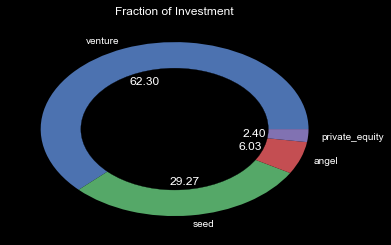

In [77]:
# create a figure and set different background
fig = plt.figure()
fig.patch.set_facecolor('black')
 
# Change color of text
plt.rcParams['text.color'] = 'white'
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='black')
 
# Pieplot + circle on it
plt.pie(round_types.values, labels=round_types.index, autopct='%.2f')
plt.title('Fraction of Investment')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [78]:
# Average funding amount for venture type
venture_mean = master_frame_original[master_frame_original['funding_round_type']=='venture'].raised_amount_usd.mean()/1000000
print(f"Average funding amount raised: {round(venture_mean, 2)}")
# Average funding amount for angel type
angel_mean = master_frame_original[master_frame_original['funding_round_type']=='angel'].raised_amount_usd.mean()/1000000
print(f"Average funding amount raised: {round(angel_mean, 2)}")
# Average funding amount for seed type
seed_mean = master_frame_original[master_frame_original['funding_round_type']=='seed'].raised_amount_usd.mean()/1000000
print(f"Average funding amount raised: {round(seed_mean, 2)}")
# Average funding amount for private equity type
equity_mean = master_frame_original[master_frame_original['funding_round_type']=='private_equity'].raised_amount_usd.mean()/1000000
print(f"Average funding amount raised: {round(equity_mean, 2)}")


Average funding amount raised: 11.75
Average funding amount raised: 0.96
Average funding amount raised: 0.72
Average funding amount raised: 73.31


Index(['venture', 'seed', 'angel', 'private_equity'], dtype='object')


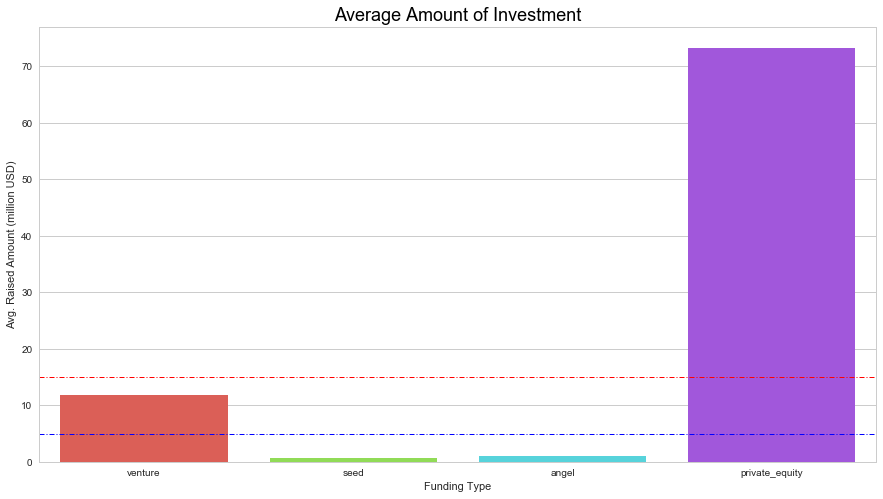

In [79]:
plt.figure(figsize=(15, 8))
plt.rcParams['text.color'] = 'black'
print(round_types.index)
s=sns.barplot(x=['venture', 'seed', 'angel', 'private_equity'], y=[venture_mean, seed_mean, angel_mean, equity_mean],
              saturation=8, palette = 'hls', ci = 'sd')
s.set(xlabel='Funding Type', ylabel='Avg. Raised Amount (million USD)')
s.set_title('Average Amount of Investment',fontsize =18,color='Black')
plt.axhline(y=5, xmin=0, xmax=1,color='Blue',dashes=(5,2,1,2),linewidth=1.0)
plt.axhline(y=15, xmin=0, xmax=1,color='Red',dashes=(5,2,1,2),linewidth=1.0)
plt.show()

<blockquote> From the above plots is it's evident that Venture type of Funding is most suitable for Spark Funds, because -
<ol><li>Mean investment falls between 5 to 15 million USD</li>
<li>Most of the investments happened under this investment type</li></ol>

## Plots - Country-wise Analysis

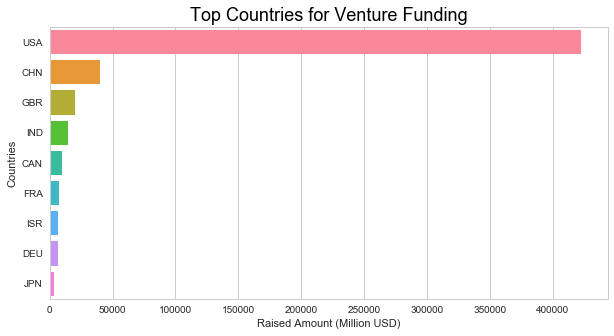

     country_code  raised_amount_usd
Rank                                
1             USA         422510.872
2             CHN          39835.418
3             GBR          20245.629
4             IND          14391.859
5             CAN           9583.323
6             FRA           7259.532
7             ISR           6907.514
8             DEU           6346.960
9             JPN           3363.676 

Top 3 english speaking countries in order are: USA, GBR, IND


In [80]:
#A plot showing the top 9 countries against the total amount of investments of funding type 'Venture'
plt.figure(figsize=(10,5))
c=sns.barplot(x='raised_amount_usd', y='country_code', data=top9,  estimator=np.sum, saturation=8)
c.set(xlabel='Raised Amount (Million USD)', ylabel='Countries')
c.set_title('Top Countries for Venture Funding',fontsize =18, color='Black')
plt.show()
print(top9, '\n')
print("Top 3 english speaking countries in order are: USA, GBR, IND")

## Plots - Sector Analysis for Top 3 Countries

In [81]:
master_D=D1[D1['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]

In [82]:
master_D=master_D.append(D2[D2['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])], ignore_index=True)

In [83]:
master_D=master_D.append(D3[D3['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','News, Search and Messaging'])], ignore_index=True)

In [84]:
master_D.head()

,company_permalink,funding_round_permalink,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,Primary_Sector,main_sector,count_of_invest,sum_of_invest
0,/organization/22nd-century-group,/funding-round/50617d7ea8eaa838e2fd8eb8dfe06054,10.000,/organization/22nd-century-group,22nd Century Group,http://www.xxiicentury.com,Biotechnology,ipo,USA,Biotechnology,Cleantech / Semiconductors,2305,21251.639
1,/organization/23andme,/funding-round/97062e0d50c2955cbe40bf8220d87b08,9.000,/organization/23andme,23andMe,http://23andme.com,Biotechnology|Search,operating,USA,Biotechnology,Cleantech / Semiconductors,2305,21251.639
2,/organization/23andme,/funding-round/c27c1b420dfb34677a6ba449524f1c88,12.600,/organization/23andme,23andMe,http://23andme.com,Biotechnology|Search,operating,USA,Biotechnology,Cleantech / Semiconductors,2305,21251.639
3,/organization/23andme,/funding-round/f261366b4fbf1840ad71b20ea0d9c7ce,9.000,/organization/23andme,23andMe,http://23andme.com,Biotechnology|Search,operating,USA,Biotechnology,Cleantech / Semiconductors,2305,21251.639
4,/organization/3-v-biosciences,/funding-round/069e2f1ded2f499d232c3d7ec762c0e2,14.279,/organization/3-v-biosciences,3-V Biosciences,http://www.3vbio.com,Biotechnology,operating,USA,Biotechnology,Cleantech / Semiconductors,2305,21251.639


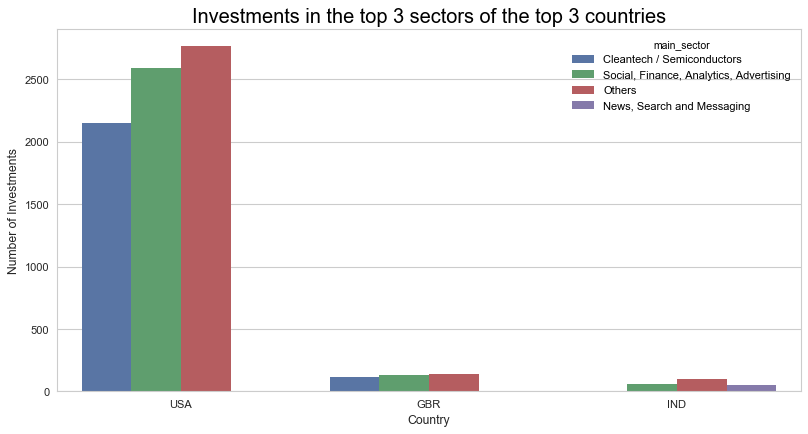

In [86]:
# set figure size for larger figure
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
s=sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector", data=master_D,estimator=lambda x: len(x))
s.set(xlabel='Country', ylabel='Number of Investments')
s.set_title('Investments in the top 3 sectors of the top 3 countries',fontsize =18,color='Black')
plt.show()